In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [137]:
ac = pd.read_csv("ac_scandinavia_cv_results.txt",sep="\t")

In [138]:
ac = ac.sort_values(["Labels"])

In [139]:
ac.shape

(14800, 2)

In [140]:
ac.head()

,Predictions,Labels
0,finland,finland
8460,finland,finland
8461,finland,finland
8462,finland,finland
8463,finland,finland


In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [142]:
pred = ac['Predictions'].values


In [143]:
labels = ac['Labels'].values
labels

array(['finland', 'finland', 'finland', ..., 'sweden', 'sweden', 'sweden'],
      dtype=object)

In [144]:
conf_matrix = confusion_matrix(labels,pred)

In [145]:
conf_matrix

array([[5000,    0,    0],
       [   0, 4800,    0],
       [   0,    0, 5000]])

In [146]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (%)',
                          cmap=plt.cm.Purples):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)*100

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=16, rotation=45)
    plt.yticks(tick_marks, classes, fontsize=16)
    
    fmt = '0.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=12)

    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.tight_layout()
    

In [147]:
class_names = np.unique(labels)

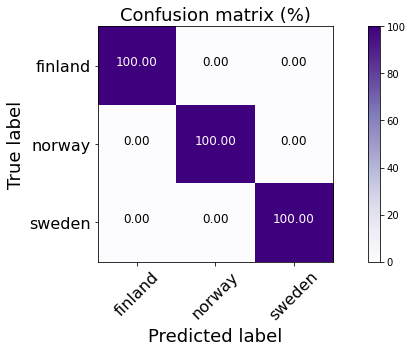

In [148]:
fig = plt.figure(figsize=(10,5))
plot_confusion_matrix(conf_matrix, classes=class_names,normalize=True)

In [149]:
fig.savefig("Confusion_matrix_normalized.pdf")